# Reconnaissance du son d'un frelon

### Découpage de la vidéo

Découpage de la vidéo https://www.youtube.com/watch?v=WW2pslED0v8 pour savoir si l'on entend un frelon ou pas.

`Tests` contient les intervalles de temps où un frelon est présent dans les 3 premières minutes de la vidéo. Sous forme :
```python
dict = {
    (début en chaine de caractères, fin): True si Il y a un frelon, False si il y a des abeilles
}
```

In [33]:
# Import les valeurs de tests
from tests import Tests

Tests.abeilles_frelons

{('0', '0.06'): True,
 ('0.45', '0.55'): False,
 ('1.02', '1.08'): True,
 ('1.15', '1.17'): True,
 ('1.35', '1.54'): False,
 ('1.55', '2.05'): True,
 ('2.14', '2.19'): True,
 ('2.25', '2.30'): True,
 ('2.34', '2.40'): True,
 ('2.56', '3.08'): True}

### Observation des sons

Utilisation de la bibliothèque `wave` pour afficher les sons.  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#scipy.io.wavfile.read

number of channels = 2
length = 570.9322448979592s


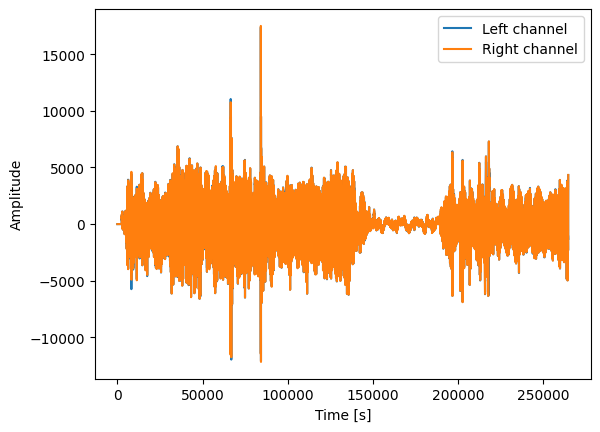

In [34]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier audio WAV
FILE = "echantillons/abeilles_frelons.wav"

def signal():
    """
    Retourne le signal du fichier dans FILE
    """
    FILE_NAME = FILE

    samplerate, data = wavfile.read(FILE_NAME)
    print(f"number of channels = {data.shape[1]}")

    length = data.shape[0] / samplerate
    print(f"length = {length}s")

    return (data, length, samplerate)

def plot(signal_, show=True):
    """
    Affiche le signal signal_ dans matplotlib

    Paramètres
    ----------
    signal_:tuple
        sous forme (data, length, samplerate)
    """

    data, length, samplerate = signal_
    time = np.linspace(0., length, data.shape[0])

    plt.plot(time, data[:, 0], label="Left channel")
    plt.plot(time, data[:, 1], label="Right channel")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    if show:
        plt.show()

def get(signal, start, end):
    """
    Renvoie le signal d'un temps de départ à un temps d'arrivée

    Parametres
    ----------
    signal:tuple
        signal sous forme de (data, length, samplerate)
    start:int
        Temps de départ en secondes
    end:int
        Temps de fin en secondes
    """ 
    data, length, samplerate = signal

    start_sample = int(start * samplerate)
    end_sample = int(end * samplerate)

    return (data[start_sample:end_sample], data[start_sample:end_sample].shape[0], samplerate)

plot(get(signal(), 0, 6))


Maintenant, on peut utiliser ces fonctions pour ne récupérer que les sons de frelons ou d'abeilles à partir du fichier `tests.py`

In [35]:
def minutes_to_seconds(minutes):
    """
    Renvoies le temps en nombre de secondes. minutes -> "1.15"
    """
    liste = minutes.split(".")

    return sum([(60**i)*int(liste[len(liste)-i-1]) for i in range(0, len(liste))])

print(minutes_to_seconds("1.20"))

# Récupérer les signaux correspondants aux abeilles et aux frelons
signaux = {
    "abeille": [],
    "frelon": [],
}

SIGNAL = signal()

for key in Tests.abeilles_frelons: # key -> ("début en minutes", "fin en minutes")
    debut, fin = minutes_to_seconds(key[0]), minutes_to_seconds(key[1])
    signal_ =  get(SIGNAL, debut, fin)

    if Tests.abeilles_frelons[key]:
        signaux["frelon"].append(signal_)
    else:
        signaux["abeille"].append(signal_)

80
number of channels = 2
length = 570.9322448979592s


Avec ces fichiers, on peut afficher les courbes pour les abeilles puis celles pour les frelons.

In [36]:
for son_abeille in signaux["abeille"]:
    pass 